# Pymaceuticals Inc.
Based on the scatter plot and the calculated correlation coefficient of 0.84, we can conclude that there is a strong positive correlation between the weight of mice and the average observed tumor volume in the Capomulin regimen. As the weight of mice increases, the average observed tumor volume also tends to increase.

The linear regression model plotted on the scatter plot confirms this positive relationship, as the line of best fit has a positive slope. The regression line can also be used to predict the average tumor volume for a given weight of mouse in the Capomulin regimen.

Overall, this analysis suggests that weight is an important factor to consider when evaluating the effectiveness of the Capomulin regimen in reducing tumor volume. Mice with higher weights may require different dosages or treatment plans to achieve similar tumor reduction results as mice with lower weights.
### Analysis
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_study_df = pd.merge(study_results, mouse_metadata, how='left',
                              on='Mouse ID')
#combined_study_data = pd.merge(study_results, mouse_metadata, how= 'left', on='Mouse ID')

# Display the data table for preview
combined_study_df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = len(combined_study_df["Mouse ID"].unique())

#print the total number of mice
print(f"Total numberof mice:{num_mice}")

Total numberof mice:249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice = combined_study_df[duplicates]['Mouse ID'].unique()
print(f'Duplicate mice:{list(duplicate_mice)}')


Duplicate mice:['g989']


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = combined_study_df.drop(combined_study_df[combined_study_df['Mouse ID'] == 'g989'].index)


In [5]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_study_df['Mouse ID'].unique())   
num_mice_clean

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# clean_study_df.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#Group the Clean dataFrame by drug regimen
grouped_regimen = clean_study_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].var()
std_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume':mean_tumor_volume,
                           'Median Tumor Volume':median_tumor_volume,
                           'Variance Tumor Volume':variance_tumor_volume,
                           'STD Tumor Volume':std_tumor_volume,
                           'SEM Tumor Volume':sem_tumor_volume})
#print the summary table
summary_df



,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

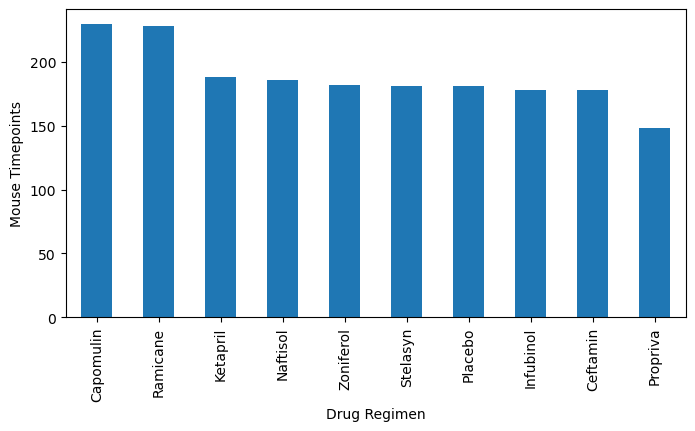

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_study_df['Drug Regimen'].value_counts()
# regimen_count
#create a chart
regiman_chart = regimen_count .plot(kind='bar', figsize=(8,4))

#set a xlabels and ylabel
regiman_chart.set_xlabel("Drug Regimen")
regiman_chart.set_ylabel("Mouse Timepoints")

plt.show()
plt.tight_layout()


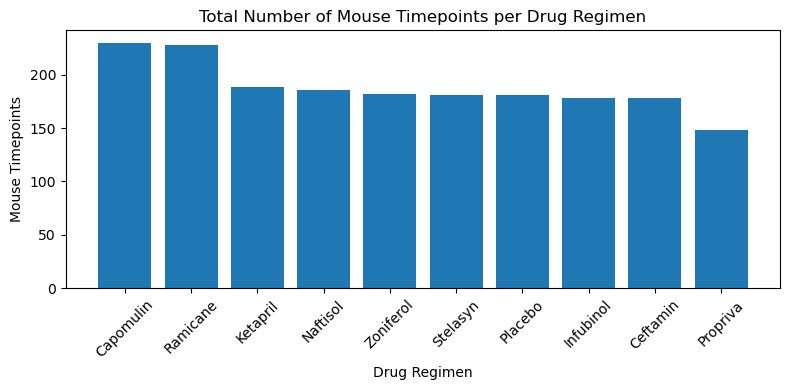

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_count = clean_study_df['Drug Regimen'].value_counts()

# create a bar chart using pyplot
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(regimen_count.index, regimen_count.values)

# set axis labels and chart title
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Mouse Timepoints")
ax.set_title("Total Number of Mouse Timepoints per Drug Regimen")

# rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



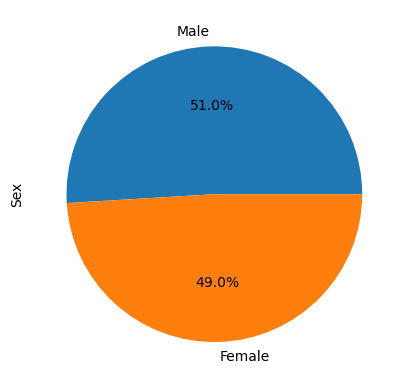

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#group_gender = clean_study_df.groupby(['Sex'])
#gender_counts = group_gender['Mouse ID'].nunique()
gender_counts = clean_study_df['Sex'].value_counts()
gender_counts.plot(kind='pie', autopct="%1.1f%%", startangle=0)

# Set the title for the chart
 #labels for the section of pie chart
labels = ["Male", "Female"]
colors = ["orange", "blue"]

plt.show()



# fig = plt.figure(figsize=(7,5))
                 
# # Automatically finds the percentages of each part of the pie chart
# plt.pie(labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)


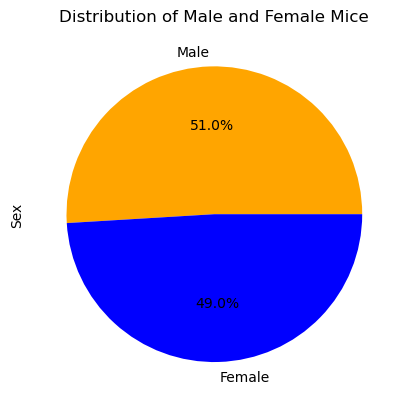

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = clean_study_df['Sex'].value_counts()

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the pie chart
ax.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%", startangle=0, colors=["orange", "blue"])

# Set the title for the chart
ax.set_title("Distribution of Male and Female Mice")

# Give our chart some labels and a tile

plt.ylabel("Sex")

# Display the chart
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# Define a list of the four treatment regimens
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the clean_study_df to only include data from the four treatment regimens
filtered_df = clean_study_df[clean_study_df['Drug Regimen'].isin(treatment_list)]

# Group the filtered_df by Mouse ID and get the maximum timepoint for each mouse
max_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge the max_timepoint series with the filtered_df to get the final tumor volume for each mouse
final_volume_df = pd.merge(max_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

final_volume_df





,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
...,...,...,...
95,y769,Ceftamin,68.594745
96,y793,Capomulin,31.896238
97,y865,Ceftamin,64.729837
98,z578,Ramicane,30.638696


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = clean_study_df.loc[(clean_study_df["Drug Regimen"] == treatment) & 
                                         (clean_study_df["Timepoint"] == 45), "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    # Print the summary statistics and potential outliers for each regimen
 
    print(f"{treatment} Summary Statistics:")
 
    print(f"Quartiles: {quartiles}")
    # print(f"Lower Quartile: {lowerq}")
    # print(f"Upper Quartile: {upperq}")
    # print(f"Interquartile range: {iqr}")
    # print(f"Lower Bound: {lower_bound}")
    # print(f"Upper Bound: {upper_bound}")
    # print(f"Number of Potential Outliers: {len(outliers)}")
    # if len(outliers) > 0:
    #     print(f"Potential Outliers: {outliers.values}")
 



Capomulin Summary Statistics:
Quartiles: 0.25    32.377357
0.50    37.311846
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
Ramicane Summary Statistics:
Quartiles: 0.25    30.981175
0.50    34.848627
0.75    38.508305
Name: Tumor Volume (mm3), dtype: float64
Infubinol Summary Statistics:
Quartiles: 0.25    62.754451
0.50    66.083066
0.75    67.685569
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Summary Statistics:
Quartiles: 0.25    61.433892
0.50    64.299830
0.75    67.527482
Name: Tumor Volume (mm3), dtype: float64


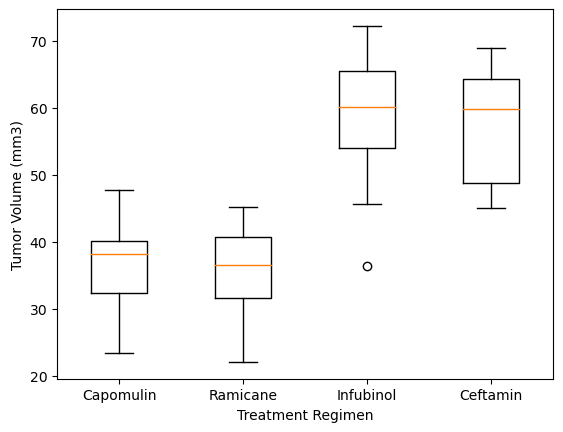

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Filter the clean_study_df to only include data from the four treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_data = clean_study_df[clean_study_df['Drug Regimen'].isin(treatments)]

# Group the data by Drug Regimen and Mouse ID to get the final tumor volume for each mouse
treatment_data = treatment_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

# Create a list of the tumor volume data for each treatment group
tumor_volumes = [treatment_data[treatment].values for treatment in treatments]

# Generate a box plot using Matplotlib's pyplot methods
fig, ax = plt.subplots()
ax.boxplot(tumor_volumes)

# Set the title and labels for the chart
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

# Set the x-axis tick labels to the treatment names
ax.set_xticklabels(treatments)

plt.show()



## Line and Scatter Plots

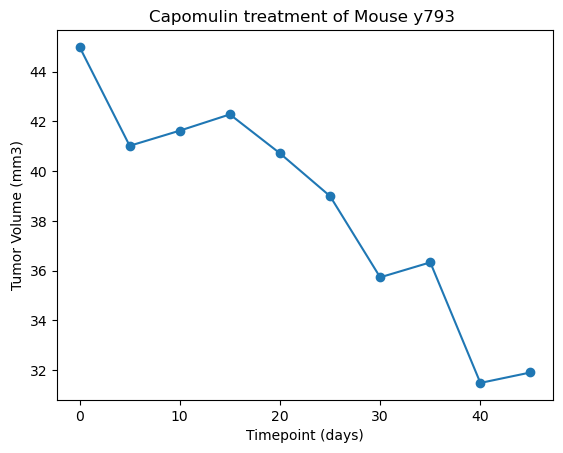

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a mouse treated with Capomulin
mouse_id = 'y793'
capomulin_df = clean_study_df[clean_study_df['Drug Regimen'] == 'Capomulin']
mouse_df = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Create a line plot of tumor volume vs. time point
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='o')

# Set chart title and axis labels
plt.title(f"Capomulin treatment of Mouse {mouse_id} ")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()





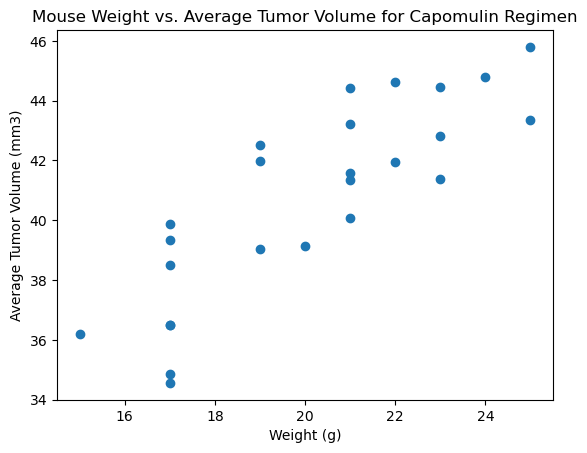

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group the Capomulin data by Mouse ID to get the average tumor volume and weight for each mouse
capomulin_grouped = capomulin_df.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

# Create a scatter plot of the average tumor volume vs. the weight for each mouse
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

# Set the title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The correlation coefficient is: 0.84


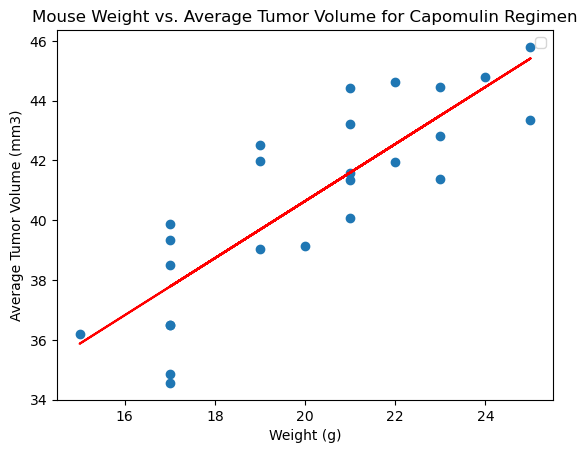

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
import scipy.stats as st

# Group the Capomulin data by Mouse ID 
capomulin_grouped = capomulin_df.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})

# Create a scatter plot of the average tumor volume vs. the weight for each mouse
plt.scatter(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])

# Set the title and axis labels
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Calculate the correlation coefficient
corr_coef, _ = st.pearsonr(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
print(f"The correlation coefficient is: {corr_coef:.2f}")

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_grouped["Weight (g)"], capomulin_grouped["Tumor Volume (mm3)"])
plt.plot(capomulin_grouped["Weight (g)"], intercept + slope * capomulin_grouped["Weight (g)"], 'r')

# Show the plot and legend
plt.legend()
plt.show()



